# Dimensionality Reduction

UMAP, t-SNE, and PCA belong to the family of **dimensionality reduction** techniques.

### **1. What is Dimensionality Reduction?**

Dimensionality reduction refers to the process of transforming data from a high-dimensional space into a lower-dimensional space, so that the low-dimensional representation retains some meaningful properties of the original data. It's especially useful when dealing with data that has hundreds or thousands of dimensions (or features).

Check out this great visual tool the [Embedding Projector](https://projector.tensorflow.org/)

### **2. Main Use Cases:**

- **Visualization**: One of the most common uses. By reducing data to 2D or 3D, it can be visualized easily, helping in understanding the structure and relationships in the data.
- **Noise Reduction**: By keeping only the most important dimensions, it can help remove noise from the data.
- **Efficiency**: High-dimensional data can be computationally expensive in terms of storage and processing time. Reducing dimensions can lead to faster processing times.
- **Avoiding the Curse of Dimensionality**: In high dimensions, data becomes sparse, and algorithms struggle to identify patterns. Reducing dimensions can alleviate this.
- **Feature Extraction**: Creating new features from the original ones, which might be more informative for predictive modeling.

### **3. Key Members of the Dimensionality Reduction Family:**

- **PCA (Principal Component Analysis)**: A linear technique that identifies the axes in the data that maximize variance.
- **t-SNE (t-Distributed Stochastic Neighbor Embedding)**: A non-linear technique particularly well-suited for visualizing clusters in high-dimensional data.
- **UMAP (Uniform Manifold Approximation and Projection)**: A relatively new non-linear technique that is faster than t-SNE and often provides better separation of clusters.
- **LDA (Linear Discriminant Analysis)**: While similar to PCA, LDA focuses on maximizing the separability among known categories.
- **Autoencoders**: Neural networks used for dimensionality reduction. They compress the data and then reconstruct it.
- **Factor Analysis**: Used in psychometrics and social sciences to model observed variables based on underlying latent factors.

### **4. Key Considerations for Dimensionality Reduction:**

- **Linearity vs. Non-linearity**: Techniques like PCA are linear, meaning they can only capture linear relationships. Techniques like t-SNE and UMAP are non-linear and can capture more complex patterns.
- **Preservation of Global vs. Local Structure**: Some techniques, like PCA, prioritize preserving global structure (relationships between distant points), while others, like t-SNE, prioritize local structure (relationships between close points).
- **Computational Efficiency**: As datasets grow, some techniques become computationally challenging. UMAP generally offers a good trade-off between performance and speed.
- **Interpretability**: Techniques like PCA offer a clear interpretation (principal components are linear combinations of original features). In contrast, t-SNE and UMAP results can be harder to interpret directly.

### **Conclusion:**

Dimensionality reduction techniques, whether linear or non-linear, are powerful tools in the data science toolkit. They aid in visualization, improve computational efficiency, and can even enhance the performance of machine learning models. Choosing the right technique depends on the nature of the data and the specific goals of the analysis.

In [1]:
!pip install umap-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 44.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82807 sha256=fb7249658b652e26487e5faf85d895f0f77ac18c19e05688fcc71eacebd69250
  Stored in directory: /root/.cache/pip/wheels/a0/e8/c6/a37ea663620bd5200ea1ba0907ab3c217042c1d035ef606acc
  Created wheel for pynndescent: filename=pynndescent-0.5.10-py3-none-any.whl size=55615 sha256=b1ac25eb931ff7eda813cd5c370ae5d3fb165c5b60d86890f633b88826afb5e7
  Stored in directory: /root/.cache/pip/wheels/4a/38/5d/f60a40a66a9512b7e5e83517ebc2d1b42d857be97d135f1096
Successfully built umap-learn pynndescent


# UMAP (Uniform Manifold Approximation and Projection)

### **1. UMAP in Simple Terms**

Imagine you have a crumpled piece of paper with a drawing on it, and you want to lay it flat without tearing it or altering the drawing too much. UMAP tries to do something similar with data, "flattening" complex, high-dimensional datasets into lower dimensions while preserving the relationships between data points as much as possible.

### **2. What is it Used For?**

**Dimensionality Reduction**: Like t-SNE and PCA, UMAP is used to reduce the number of dimensions in a dataset. This is particularly useful when you're dealing with data that has many features and you want to visualize or simplify it.

### **3. When Would You Use it?**

- **Visualization**: To visualize high-dimensional data in 2D or 3D space.
  
- **Pre-processing**: Before feeding data into machine learning models, especially when the original dimensionality is prohibitively high or when there's a need to speed up computation.

- **Noise Reduction**: To smooth out noise and retain only the most prominent structures in the data.

### **4. Why Use UMAP Rather Than Another Approach?**

- **Speed**: UMAP is often faster than other dimensionality reduction methods, especially t-SNE, when dealing with large datasets.
  
- **Flexibility**: UMAP supports more than just Euclidean distances. It can work with other distance metrics, making it adaptable to different kinds of data.
  
- **Preservation of Global Structure**: While t-SNE is known for preserving local structures (how individual points relate to their close neighbors), UMAP balances the preservation of both local and more global structures.
  
- **Generalization**: Unlike t-SNE, UMAP can be used for out-of-sample data points. This means you can transform new data points in the future using the same UMAP model.

### **5. Conclusion**

UMAP is a powerful tool for dimensionality reduction, offering a combination of speed, flexibility, and preservation of data structures. While tools like PCA are linear and may not capture intricate data relationships, and while t-SNE excels at preserving local structures, UMAP offers a balance between local and global structure preservation. For machine learning practitioners, it provides another robust tool in the toolkit for visualizing, understanding, and pre-processing high-dimensional data.

---

UMAP is a versatile tool with several hyperparameters that can be tweaked based on the specifics of your dataset and what you aim to achieve. Let's lay out the steps and then provide a simple code example.

### **Steps to Run UMAP:**

1. **Data Preparation**: Ensure your data is appropriately preprocessed. This might include normalization, scaling, or other transformations relevant to your dataset.

2. **Choosing Hyperparameters**:
   - **Number of Neighbors**: This determines the size of the local neighborhood UMAP will consider when trying to learn the manifold structure. A smaller value will preserve more local structure at the risk of losing the broader context. A larger value will try to capture more of the global structure.
   - **Number of Components**: The dimension of the space you want to reduce your data to (typically 2 for visualization).
   - **Metric**: The distance metric (e.g., Euclidean, Manhattan, cosine).
   - **Number of Epochs**: The number of training epochs for the optimization. More epochs might give a more accurate embedding but will take longer.

3. **Run UMAP**: Apply UMAP to your dataset.

4. **Visualization/Utilization**: Visualize the results if you've reduced to 2 or 3 dimensions or use the reduced data for other tasks like clustering or as input to machine learning models.

### **UMAP in Python:**

While there's no native PyTorch implementation for UMAP, there's a popular `umap-learn` package in Python. You can install it using pip:


This script fetches the MNIST dataset, applies UMAP to reduce it to 2 dimensions, and then visualizes the result. You should see clusters corresponding to different digits.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
import umap

# Fetching the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
data = mnist.data




/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


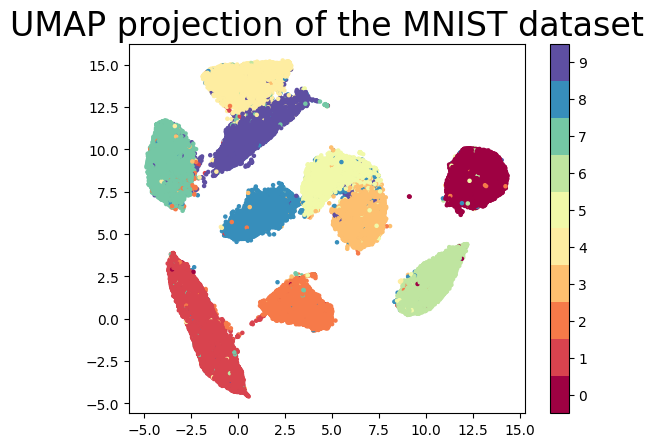

CPU times: user 39.2 s, sys: 1.05 s, total: 40.2 s
Wall time: 23.8 s


In [6]:
%%time

# Applying UMAP
reducer = umap.UMAP(n_neighbors=10, n_components=2, metric='euclidean', n_epochs=100)
embedding = reducer.fit_transform(data)

# Visualizing the result
plt.scatter(embedding[:, 0], embedding[:, 1], c=mnist.target.astype(int), cmap='Spectral', s=5)
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('UMAP projection of the MNIST dataset', fontsize=24)
plt.show()

# t-SNE (t-Distributed Stochastic Neighbor Embedding)

### **1. t-SNE in Simple Terms**

Imagine you have a bunch of people in a room and you're viewing them from above. You notice that groups of friends are standing close together, forming clusters. Now, you want to make a sketch of the room on a small piece of paper, ensuring that friends who were close together in the room remain close in your sketch. t-SNE does a similar thing, but with data points: it maps high-dimensional data to a 2D or 3D space in a way that preserves the clustering and relationships of the original data as much as possible.

### **2. What is it Used For?**

**Visualization of High-dimensional Data**: t-SNE is primarily used for the visualization of high-dimensional datasets. By reducing these datasets to 2D or 3D, it becomes possible to spot patterns, clusters, and relationships visually.

### **3. When Would You Use it?**

- **Exploratory Data Analysis (EDA)**: When you're first looking at a dataset and want to understand its structure.
  
- **Feature Extraction**: Before feeding data into a machine learning model, especially if you believe there are inherent clusters or groupings in your data that other dimensionality reduction methods aren't capturing well.
  
- **Comparing Groups**: For example, in single-cell RNA sequencing, researchers use t-SNE to visualize and compare different cell types.

### **4. Why Use t-SNE Rather Than Another Approach?**

- **Preservation of Local Structure**: t-SNE is particularly good at preserving local structures, meaning that if two data points are close together in the original space, they'll likely be close in the reduced space.
  
- **Flexibility**: While linear methods like PCA might fail to capture complex non-linear relationships, t-SNE, being a non-linear method, can potentially capture them.
  
- **Visual Clarity**: t-SNE often produces visually compelling and interpretable plots where clusters are clearly separated.

### **5. Points of Caution**

While t-SNE has its strengths, there are considerations to keep in mind:

- **Computational Cost**: t-SNE can be computationally intensive, especially with large datasets.
  
- **Non-deterministic**: Running t-SNE multiple times on the same data can produce different results since it has a random initialization step.
  
- **Hyperparameters**: The algorithm's main hyperparameters, especially the "perplexity," can significantly influence the results. It's often a good idea to try multiple perplexity values to ensure consistent patterns.

- **No Guarantees on Global Structure**: While t-SNE preserves local structures well, it doesn't necessarily maintain the broader relationships between more distant data points.

### **6. Conclusion**

t-SNE is a powerful tool for visualizing high-dimensional data, especially when clear clustering or groupings are present. However, like all tools, it's essential to understand its strengths and limitations. Using t-SNE in combination with other dimensionality reduction techniques and consistently checking the results can give a more rounded understanding of a dataset.

---


## **Steps to Run t-SNE:**

1. **Data Preparation**:
   - Your data should be appropriately preprocessed. This might include normalization, scaling, or other transformations relevant to your dataset.
   - It's often recommended to reduce dimensions with a method like PCA first, especially if the initial dimensionality is very high.

2. **Choosing Hyperparameters**:
   - **Perplexity**: A major hyperparameter. It can be thought of as a knob that sets the number of nearest neighbors t-SNE considers when generating the embedding. Typical values are between 5 and 50.
   - **Learning Rate**: Often set between 10 and 1000. It determines the step size at each iteration while t-SNE searches for a low-dimensional representation.
   - **Number of Iterations**: The number of iterations for optimization. Usually, a higher number gives more accurate embeddings.

3. **Run t-SNE**: Apply t-SNE to your dataset.

4. **Visualization**: Visualize the results in 2D or 3D.

### **t-SNE in Python:**

The popular `scikit-learn` library has a straightforward implementation of t-SNE.

### **Simple Example with t-SNE on MNIST**:


This code fetches the MNIST dataset, optionally reduces its dimensionality using PCA (often a good first step before t-SNE), applies t-SNE, and then visualizes the result. Adjusting hyperparameters, especially perplexity, can lead to different visualizations, so it's good to experiment and see what gives the most informative result for your specific dataset.

---

## t-SNE is computationally intensive

t-SNE can indeed be computationally intensive, especially on large datasets. Here are some suggestions to speed it up:

### **1. Reduce Initial Dimensionality with PCA:**

Before applying t-SNE, you can use PCA to reduce the data's dimensionality, which can speed up t-SNE significantly. For instance, if you have a dataset with 784 features (like MNIST), you can reduce it to 50 dimensions using PCA and then apply t-SNE. This not only speeds up the process but can also sometimes improve the quality of the visualization.

### **2. Adjust the Number of Iterations:**

By default, t-SNE might run for 1000 iterations or more. Depending on your dataset, you might start seeing stable clusters with fewer iterations. You can reduce the `n_iter` parameter, but be cautious, as this might affect the quality of the results.

### **3. Use a Subset of Your Data:**

For visualization purposes, sometimes you don't need to use the entire dataset. A representative subset can often give you a good idea of the data's structure. Randomly sampling a subset of your data can speed up t-SNE considerably.

### **4. Increase the Learning Rate:**

The `learning_rate` parameter determines the step size at each iteration while t-SNE searches for a low-dimensional representation. While the typical values are between 10 and 1000, increasing the learning rate can speed up the process. However, a learning rate that's too high may lead to suboptimal results.

### **5. Use Faster Implementations of t-SNE:**

The default t-SNE implementation in scikit-learn is not the fastest one available. There are optimized versions like MulticoreTSNE which can be much faster, especially on multi-core machines.

For instance, you can install and use `MulticoreTSNE`:

```python
!pip install MulticoreTSNE
from MulticoreTSNE import MulticoreTSNE as TSNE

tsne = TSNE(n_jobs=4)  # Use 4 cores
```

### **6. Early Exaggeration Phase:**

The `early_exaggeration` parameter in scikit-learn's t-SNE implementation influences the space between natural clusters in the original space. By default, this is set to 12.0. Adjusting this might speed up convergence, but it's a trade-off between speed and accuracy.

### **Conclusion:**

While these methods can speed up t-SNE, it's essential to be aware that tweaking parameters or using subsets of the data might affect the results' quality. Always validate and interpret your visualizations carefully.

In [7]:
!pip install numpy matplotlib scikit-learn


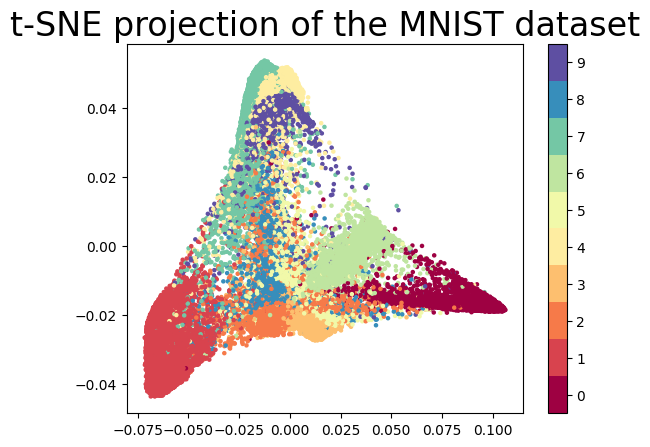

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Fetching the MNIST dataset
# mnist = fetch_openml('mnist_784', version=1)
# data = mnist.data

# Optional: PCA to reduce dimensionality before t-SNE
# data_pca = PCA(n_components=50).fit_transform(data)

# Applying t-SNE
tsne = TSNE(n_components=2, perplexity=30, learning_rate=10, n_iter=250)
embedding = tsne.fit_transform(data)
# embedding = tsne.fit_transform(data_pca)

# Visualizing the result
plt.scatter(embedding[:, 0], embedding[:, 1], c=mnist.target.astype(int), cmap='Spectral', s=5)
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('t-SNE projection of the MNIST dataset', fontsize=24)
plt.show()


# PCA (Principal Component Analysis)

### **1. PCA in Simple Terms:**

Imagine you have a cloud of points in a 3D space, and you want to find the "best" flat sheet (a plane) that comes as close as possible to all those points. Once you find that plane, you can then describe each point's position using just two coordinates instead of three. This is the essence of dimensionality reduction. PCA helps you find those "best" directions (called principal components) that capture the most variance (or spread) of the data.

### **2. What is PCA Used For?**

**Dimensionality Reduction**: When you have data with many features (dimensions), PCA can help reduce the number of features while retaining the most important information.

**Visualization**: It's challenging to visualize data in high-dimensional spaces. By reducing data to 2 or 3 principal components, you can plot it.

**Noise Filtering**: PCA can help in focusing on the main features of the data and leave out the noise.

**Preparing Data for Other Algorithms**: Some algorithms might suffer from the "curse of dimensionality" (they don't work well with a high number of features). Using PCA can mitigate this.

### **3. When Would You Use It?**

- **Exploratory Data Analysis (EDA)**: Get a feel for the structure and relationships in your data.
  
- **Before Applying Other Algorithms**: Especially when computational efficiency is a concern or when algorithms don't handle a large number of features well.
  
- **When Facing Overfitting**: If a model is too complex and overfits the training data, reducing its dimensionality with PCA can help.

### **4. Why Use PCA Rather Than Another Approach?**

- **Orthogonal Transformation**: PCA provides a brand-new set of features that are all orthogonal (uncorrelated), which can be beneficial for many statistical techniques.
  
- **Maximizing Variance**: PCA ensures that the first principal component captures the most variance, the second captures the second most, and so on. This is a systematic way to reduce dimensions.
  
- **Simplicity and Generality**: PCA doesn't make strong assumptions about the structure of the data, making it broadly applicable.

### **5. Points of Caution**

- **Linear Technique**: PCA assumes that the data's underlying structure is linear. It won't capture non-linear relationships as effectively as some other dimensionality reduction techniques.
  
- **Variance vs. Importance**: PCA focuses on capturing the most variance, which doesn't necessarily mean capturing the most "important" or "meaningful" features of the data. For example, a feature with a broad range of values will have a higher variance than a feature with a small range, even if the latter is more critical.

### **6. Conclusion**

PCA is a powerful, general-purpose tool for reducing the dimensionality of data. Its strength lies in its simplicity, but it's essential to be aware of its linear nature and the distinction between variance and importance. Using PCA in conjunction with other techniques can provide a more rounded understanding of a dataset.



## Running PCA for Exploratory Data Analysis (EDA)

This involves a series of steps to ensure you extract meaningful information from the reduced dimensions.

### **1. Data Preparation:**
- Ensure your data is appropriately preprocessed. This could involve:
  - Handling missing values.
  - Scaling the data so that all features have a similar scale. This is crucial because PCA is sensitive to the magnitudes of the features.

### **2. Applying PCA:**
- Decide the number of components you want to reduce your data to. This often requires balancing between retaining information and reducing dimensionality.
- Transform the original data using PCA to get the principal components.

### **3. Analyzing Results:**
- Check the explained variance by each principal component. This helps in understanding how much information is retained in the reduced dimensions.
- Visualize the data in the reduced dimensions (especially useful when reduced to 2 or 3 dimensions).
- If necessary, inspect the PCA components to see which original features contribute most to each principal component.

### **PCA in Python using Scikit-learn:**

The `scikit-learn` library provides a straightforward implementation.

This code first scales the Iris dataset, then applies PCA to reduce it to two dimensions, and finally visualizes the results. You can see how well-separated the different classes of the Iris dataset are in the reduced dimension space.

---



## Interpreting the results of PCA can be broken down into a few key aspects.

### **1. The Nature of PCA:**

PCA is a dimensionality reduction technique. The primary goal is to take a high-dimensional dataset and reduce its dimensions such that the most variance in the data is retained. It achieves this by finding new axes (called principal components) that maximize the variance.

### **2. Principal Components:**

The axes of the plot (ranging from -3 to 3 in your visualization) represent the first two principal components. These components are linear combinations of the original features and are orthogonal to each other. They are chosen because they capture the most variance:

- The x-axis (the first principal component) captures the most variance in the data.
- The y-axis (the second principal component) captures the second most variance, and so on.

### **3. Clusters in the Graph:**

The three fairly distinct clusters you see correspond to the three species in the Iris dataset. The fact that they form distinct clusters in the PCA plot suggests that these species have different morphological measurements, and these differences are significant enough to be captured even after reducing the data to two dimensions.

### **4. Explained Variance:**

The `explained_variance_ratio_` attribute tells you how much of the total variance is captured by each principal component. If the first two components have, for example, explained variance ratios of 0.7 and 0.2 respectively, that means the first component explains 70% of the variance in the data, and the second explains 20%.

### **5. Interpreting the Scale (-3 to 3):**

After scaling the data, each feature has a mean of 0 and a standard deviation of 1. The spread you see, from -3 to 3, represents data points in terms of their standard deviations from the mean along the principal components. Points at -3 or 3 are three standard deviations away from the mean.

### **6. How to Explain the Graph:**

Imagine you have measurements of the iris flowers in 4 dimensions (sepal length, sepal width, petal length, petal width). It's impossible to visualize 4 dimensions directly. What PCA does is find the best "view" or "angle" to see the data in 2D such that you can still observe as much of the original variation as possible.

The resulting graph shows this "best view". Each point on the graph represents an iris flower. The position of each point is determined by the flower's measurements, but instead of being in 4D, they're now in 2D. The fact that flowers of the same species cluster together indicates that their measurements are similar.

### **Conclusion:**

In essence, PCA has given you a simplified, bird's-eye view of the data, making it easier to spot patterns, differences, or similarities between different iris species. This visualization can be especially powerful when trying to understand and explain complex datasets.

In [11]:
!pip install numpy matplotlib scikit-learn seaborn

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names



Explained variance ratio (first two components): [0.72962445 0.22850762]


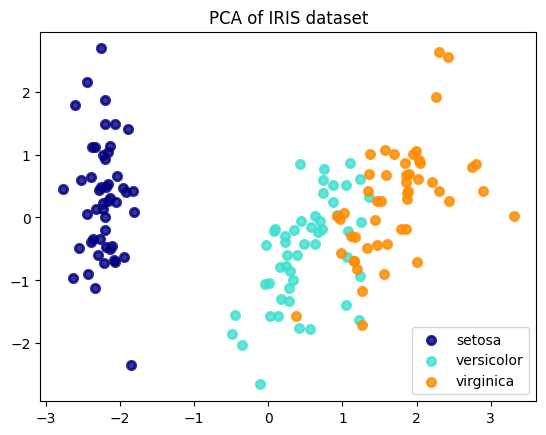

In [12]:
# Scale the data
X_scaled = StandardScaler().fit_transform(X)

# Apply PCA and reduce the data to 2 dimensions
pca = PCA(n_components=2)
X_r = pca.fit_transform(X_scaled)

# Percentage of variance explained for each components
print(f'Explained variance ratio (first two components): {pca.explained_variance_ratio_}')

# Plot the data in the reduced dimensions
plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')
plt.show()

# Linear Discriminant Analysis (LDA)

### **1. What is LDA (Linear Discriminant Analysis)?**

LDA is both a dimensionality reduction technique and a classifier. As a dimensionality reduction method, it's somewhat similar to PCA (Principal Component Analysis), but with a key distinction: while PCA looks for axes (principal components) that maximize the variance of the data, LDA seeks axes that best separate known classes in the data.

### **2. The Underlying Principle of LDA:**

Imagine you have data points belonging to multiple classes scattered in a high-dimensional space. LDA tries to find a new axis in such a way that:
- The distance between the means of different classes is maximized.
- The scatter (or spread) within each class is minimized.

This effectively enhances the class separability.

### **3. Main Use Cases of LDA:**

- **Classification**: LDA can be used as a linear classifier.
- **Dimensionality Reduction**: Especially when the goal is to maintain class separability in the reduced dimensions.
- **Feature Extraction**: Transforming the data to a lower-dimensional space which can be fed into other machine learning algorithms.

### **4. When Would You Use LDA?**

- **Known Classes**: LDA requires labeled data since its primary goal is to maximize the distance between classes.
- **Multiclass Problems**: While many algorithms are binary, LDA naturally extends to more than two classes.
- **Gaussian Distributions**: LDA assumes that the features for each class are normally distributed and have the same covariance matrix.

### **5. Why Use LDA Rather Than Another Approach?**

- **Class Separability**: If preserving the separability between known classes in your data is a priority, LDA might be preferable over PCA.
- **Less Complexity**: LDA can be computationally less complex than some non-linear dimensionality reduction techniques.
- **Classifier Included**: LDA not only reduces dimensions but can also classify data, serving a dual purpose.
  
### **6. Limitations & Considerations:**

- **Assumptions**: LDA assumes that the data is normally distributed, that class covariances are identical, and that the features are statistically independent. If these assumptions are violated, LDA may not perform optimally.
- **High-Dimensional Data**: When the number of features exceeds the number of samples (a common situation in genomics, for example), LDA can run into problems unless combined with other techniques or regularization.

### **Conclusion:**

LDA is a powerful technique when working with labeled data, especially if the primary concern is maintaining or enhancing class separability. Like all techniques, its effectiveness depends on the nature of the data and the problem at hand. Understanding its underlying assumptions and mechanics can help in making an informed decision about when to use LDA.

## Steps to use LDA for dimensionality reduction.

### **1. Steps to Run LDA for Dimensionality Reduction:**

**a. Data Collection**: You'll need a dataset with labeled samples since LDA requires class labels to find the directions that maximize class separability.

**b. Preprocessing**: This includes standardizing the data so that each feature has a mean of zero and a standard deviation of one.

**c. Running LDA**: Fit the LDA model to the data and specify the number of components (dimensions) you want to reduce to.

**d. Transformation**: Transform the original data to the reduced dimensions.


In [13]:
# Importing necessary libraries
import numpy as np
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler

# Loading the dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Preprocessing: Standardize the dataset
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Applying LDA
lda = LDA(n_components=2)  # Reducing to 2 dimensions
X_lda = lda.fit_transform(X_standardized, y)

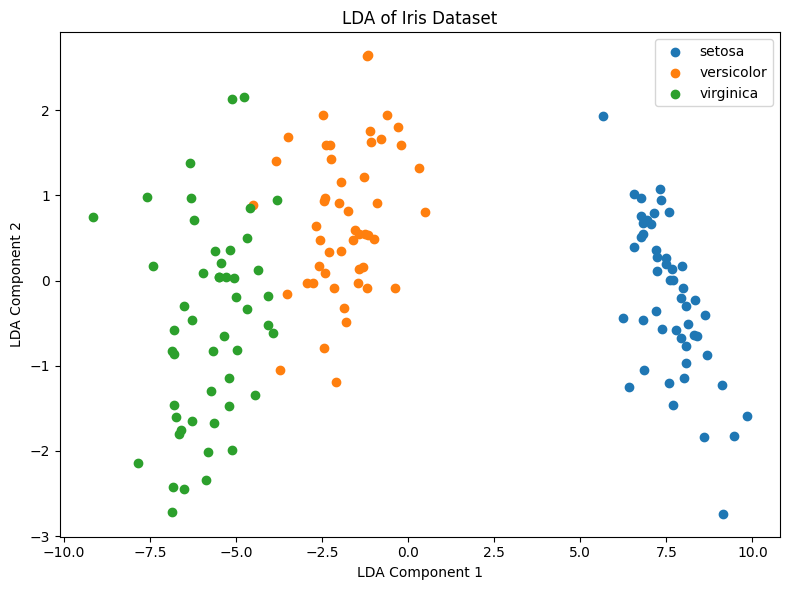

In [14]:
# Additional imports
import matplotlib.pyplot as plt

# Plotting the LDA-transformed data
plt.figure(figsize=(8,6))

for class_value in np.unique(y):
    plt.scatter(X_lda[y == class_value][:, 0], X_lda[y == class_value][:, 1], label=iris.target_names[class_value])

plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.title('LDA of Iris Dataset')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


# Autoencoders and their role in dimensionality reduction

### **1. What are Autoencoders?**

Autoencoders are a type of artificial neural network used to learn representations of data, typically for dimensionality reduction or generative purposes. They're designed to encode inputs into a compressed representation and then decode that representation back into the original data.

### **Structure of Autoencoders:**

**a. Encoder**: This part of the network compresses the input into a latent-space representation. It encodes the input image as an internal fixed-size representation in reduced dimensionality.

**b. Bottleneck**: This is the layer containing the compressed knowledge of the input data, a.k.a the encoded data.

**c. Decoder**: This part of the network reconstructs the input data from the internal representation. It maps the encoded data to the original space.

### **2. Autoencoders in Dimensionality Reduction:**

When trained properly, the bottleneck (or encoded layer) of the autoencoder will contain a compressed representation of the input data. This compressed representation can be used as a form of dimensionality reduction.

### **3. Why use Autoencoders for Dimensionality Reduction?**

- **Non-linearity**: Traditional techniques like PCA are linear. Autoencoders can capture non-linear relationships in the data.
  
- **Learning Features**: Autoencoders can learn to identify and extract salient features from the data.
  
- **Flexibility**: The architecture of autoencoders can be adjusted. For example, convolutional layers can be added to handle image data, making convolutional autoencoders.

### **4. Why use Autoencoders over other approaches?**

- **Complex Data Structures**: If the data has complex structures and non-linear relationships that PCA or other linear methods can't capture, autoencoders might be a better choice.
  
- **No Need for Labeling**: Autoencoders are unsupervised, meaning they don't require labeled data.

- **Generative Aspect**: Beyond dimensionality reduction, autoencoders can be used for generating new data that shares characteristics with the training data.

### **5. Points of Caution**:

- **Overfitting**: Autoencoders can easily overfit to training data, especially if the network is too complex relative to the amount of data and the noise level.
  
- **Lossy**: The reconstruction from an autoencoder won't be a perfect replica of the original input. It's a lossy compression.

- **Training Difficulty**: Training autoencoders, especially deep ones, can sometimes be trickier than other traditional methods.

### **Conclusion**:

Autoencoders provide a powerful, flexible tool for dimensionality reduction, especially when dealing with complex, non-linear data structures. However, like any tool, they have their strengths and weaknesses. Understanding when and how to apply them is crucial for leveraging their potential while avoiding pitfalls.



## Steps to Use an Autoencoder for Dimensionality Reduction

**a. Data Collection and Preprocessing**: This includes normalization so that features have a similar scale, which is crucial for neural networks.

**b. Define the Autoencoder Architecture**: This includes designing the encoder to compress the input and the decoder to reconstruct the original input.

**c. Train the Autoencoder**: Use the input data as both the input and the target for the neural network. The goal is to minimize the difference (loss) between the input and the reconstructed output.

**d. Extract the Encoder**: Once the autoencoder is trained, you only need the encoder part to transform your data to the reduced dimensionality.


This code sets up a basic autoencoder for the MNIST dataset, which reduces the images from 784 dimensions down to 32. After training, the encoder part of the model is used to transform the test images into the reduced dimensionality.


## The output of an autoencoder

...especially in the context of dimensionality reduction, can be used for various purposes:

1. **Visualization**: This is one of the most common applications, especially for high-dimensional data. Reducing the dimensionality to 2 or 3 dimensions allows us to visualize the data in a scatter plot or a 3D plot. By doing so, we can gain insights into the structure and relationships within the data, and see if certain groups or clusters emerge.

2. **Data Compression**: Autoencoders can be employed to compress data, though they're not typically used for general data compression tasks like ZIP or JPG. Instead, they might be used to compress specific types of data in a manner that's tailored to particular types of analysis or application.

3. **Noise Reduction**: Autoencoders can be adapted to denoising tasks. By training an autoencoder on noisy data as input and clean data as target, the encoder learns to compress the data while ignoring the noise. The decoder then reconstructs the cleaned-up data.

4. **Feature Engineering for Other Models**: The reduced dimensionality output from the encoder can be used as features for other machine learning models. This is particularly useful when the original dataset is very high-dimensional and can be prone to overfitting when used directly.

5. **Anomaly Detection**: Autoencoders can be used for anomaly detection by training the model on "normal" data. When the autoencoder encounters data that deviates from the norm (an anomaly), it will typically have a higher reconstruction error.

To your question about visualization: Yes, the reduced-dimensionality representations can be visualized, especially when dimensions are reduced to 2 or 3. This visualization can help in understanding the inherent structure of the data, identifying clusters, or spotting outliers. Visualization is especially common when using techniques like t-SNE or UMAP, but it's applicable for autoencoders as well.

For example, if you've reduced MNIST data to 2D using an autoencoder, you could create a scatter plot where each point represents an image, colored by its true label. This would let you see if, say, all the zeros are clustering together away from the ones, and so on. Such a visualization can provide insights into how well-separated different classes are in the reduced feature space.

In [15]:
!pip install torch torchvision

In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Data loading and preprocessing
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=256, shuffle=True)

test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=256, shuffle=False)

# Autoencoder architecture
class Autoencoder(nn.Module):
    def __init__(self, encoding_dim=32):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28*28, encoding_dim),
            nn.ReLU(),
        )
        self.decoder = nn.Sequential(
            nn.Linear(encoding_dim, 28*28),
            nn.Sigmoid(),
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

model = Autoencoder().to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    for data, _ in train_loader:
        data = data.view(data.size(0), -1).to(device)

        # Forward
        outputs = model(data)
        loss = criterion(outputs, data)

        # Backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

print("Training complete.")

# Encode some digits
with torch.no_grad():
    for data, _ in test_loader:
        data = data.view(data.size(0), -1).to(device)
        encoded_imgs = model.encoder(data)
        break  # to get only one batch

# encoded_imgs now contains the encoded representations from the test dataset.


100%|██████████| 9912422/9912422 [00:00<00:00, 254942152.23it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 89730143.57it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 128181254.34it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw




100%|██████████| 4542/4542 [00:00<00:00, 7095169.00it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Epoch [1/10], Loss: 0.9343
Epoch [2/10], Loss: 0.9271
Epoch [3/10], Loss: 0.9215
Epoch [4/10], Loss: 0.9153
Epoch [5/10], Loss: 0.9121
Epoch [6/10], Loss: 0.9130
Epoch [7/10], Loss: 0.9078
Epoch [8/10], Loss: 0.9082
Epoch [9/10], Loss: 0.9052
Epoch [10/10], Loss: 0.9024
Training complete.


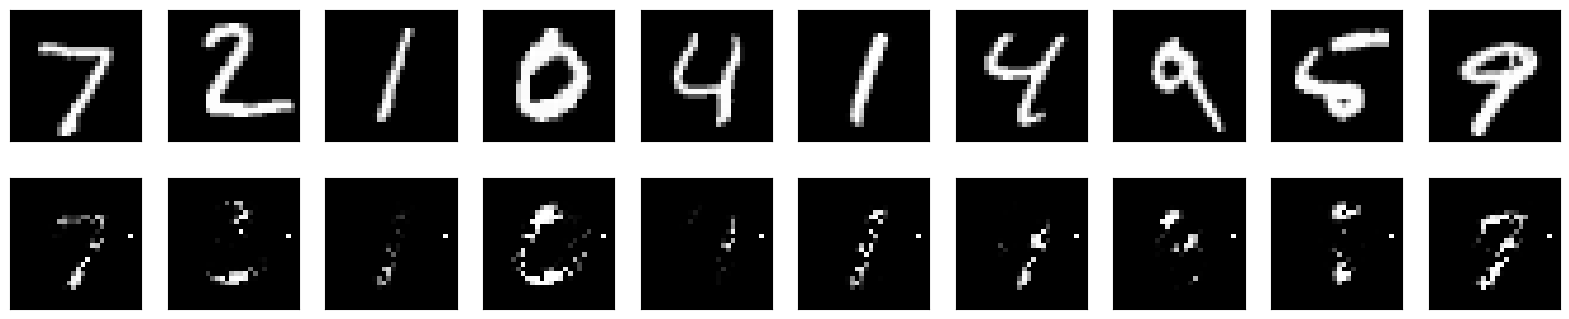

In [18]:
import matplotlib.pyplot as plt

# Take one batch of test data
test_dataiter = iter(test_loader)
images, labels = next(test_dataiter)

# Get reconstructed images
with torch.no_grad():
    images_flat = images.view(images.size(0), -1).to(device)
    reconstructions = model(images_flat)
    reconstructions = reconstructions.view(-1, 1, 28, 28).cpu()

# Plot original and reconstructed images
n = 10  # number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(images[i][0], cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructions[i][0], cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


# Additional Notes

## Autoencoders: An Overview

### What are Autoencoders?

Autoencoders are a type of artificial neural network used for unsupervised learning of efficient codings. The primary goal of an autoencoder is to learn a representation (encoding) for a set of data, typically for dimensionality reduction or feature extraction. An autoencoder has an encoder network that compresses the input and a decoder network that reconstructs the input from this compression.

### History and Evolution:

1. **1980s and 1990s**: The basic concept of autoencoders dates back to the 1980s. They were initially viewed as a competitor to principal component analysis (PCA) for linear dimensionality reduction.

2. **2006-2008**: The "Deep Learning Renaissance" period. Autoencoders experienced a resurgence due to the work of Hinton and Salakhutdinov. They demonstrated that autoencoders could be trained effectively with multiple layers, leading to the concept of "deep autoencoders". This work was key in showing that deep networks could be effectively trained, leading to the broader adoption of deep learning methodologies.

3. **2010s**: With the rise of other deep learning architectures, especially convolutional neural networks (CNNs) for image tasks and recurrent neural networks (RNNs) for sequence tasks, the focus on autoencoders diminished in some applications. However, they remained relevant for anomaly detection, dimensionality reduction, and certain generative tasks.

### Cutting-edge Era:

Autoencoders were particularly "cutting-edge" around the mid-to-late 2000s. The ability to train deep autoencoders was a significant breakthrough, providing a foundation for the broader deep learning field. Variations like sparse autoencoders, denoising autoencoders, and variational autoencoders emerged, each with unique properties and applications.

### Most Famous Use:

One of the most notable uses of autoencoders is in the training of deep belief networks (DBNs). Hinton and Salakhutdinov used stacked autoencoders to pre-train deep networks layer by layer in an unsupervised manner, followed by supervised fine-tuning. This methodology addressed the vanishing gradient problem and enabled the effective training of deeper architectures.

Another notable mention is the **Variational Autoencoder (VAE)**, a generative model that combines autoencoders with probabilistic graphical modeling. VAEs have been extensively used in generative tasks, from image generation to more complex applications like molecule design.

### Current Perspective:

While autoencoders might not be as prominently "headline-grabbing" as architectures like GANs or Transformers in the current deep learning landscape, they remain a fundamental tool. They're essential for certain niche applications (like anomaly detection), and concepts from autoencoders, especially from VAEs, have influenced various areas of machine learning.

For machine learning practitioners, understanding autoencoders is beneficial as they provide foundational knowledge about neural network training, representation learning, and unsupervised learning techniques.

## Multi-Layer Perceptrons (MLP) and Autoencoders compared

Both Multi-Layer Perceptrons (MLP) and Autoencoders are neural network architectures, but they are designed with different goals and applications in mind. Let's break down the differences step by step:

1. **Purpose**:
   - **MLP**: It's primarily used for classification or regression tasks. Given an input, an MLP aims to predict a label or value.
   - **Autoencoder**: It's designed for unsupervised learning tasks, specifically for data compression and noise reduction. The primary goal is to learn a compressed representation of the input and then reconstruct the original input from this representation.

2. **Architecture**:
   - **MLP**: Typically consists of an input layer, one or more hidden layers, and an output layer. The number of neurons in the output layer usually corresponds to the number of classes (for classification tasks) or just one neuron (for regression tasks).
   - **Autoencoder**: It has a symmetric architecture. The first half (encoder) reduces the dimensionality of the data, compressing the input into a compact latent representation. The second half (decoder) attempts to reconstruct the original input from this compressed form.

3. **Output**:
   - **MLP**: The output is a prediction, either a class label or a continuous value.
   - **Autoencoder**: The output is a reconstruction of the original input.

4. **Training Objective**:
   - **MLP**: The objective is typically to minimize the difference between the predicted labels/values and the true labels/values, using a loss function suitable for classification or regression.
   - **Autoencoder**: The objective is to minimize the reconstruction error, i.e., the difference between the original input and its reconstruction.

5. **Use Cases**:
   - **MLP**: Used for straightforward supervised learning tasks like classification and regression.
   - **Autoencoder**: Used for dimensionality reduction, denoising data, anomaly detection, and as a building block for more complex architectures like Variational Autoencoders (VAEs).

6. **Latent Representation**:
   - **MLP**: Does not explicitly aim to learn a latent representation of the data. The activations in the hidden layers can be thought of as feature representations, but they aren't the primary goal.
   - **Autoencoder**: Explicitly learns a latent representation (in the bottleneck layer) that captures the essential features of the data.

7. **Supervision**:
   - **MLP**: Requires labeled data, as it is a supervised learning algorithm.
   - **Autoencoder**: Does not require labels. It's an unsupervised algorithm since it generates its own targets by using the input data as the target.

In summary, while both MLP and Autoencoders utilize neural network structures and can have multiple layers, their objectives, architectures, and use-cases make them suitable for different tasks in machine learning.